In [ ]:
%pip install matplotlib
from matplotlib import pyplot as plt

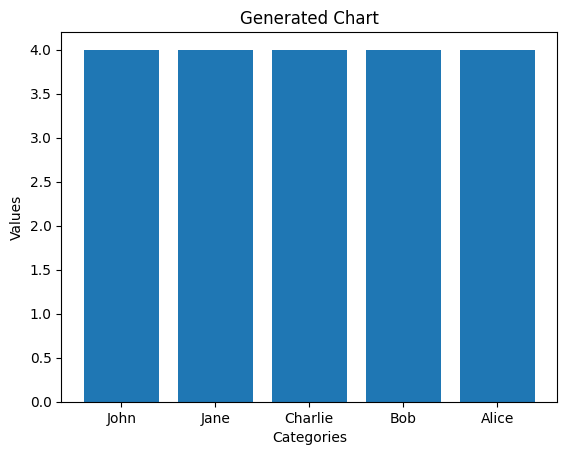

In [ ]:
data = [("John Doe", "Laptop"), ("Jane Smith", "Smartphone"), ("Alice Johnson", "Headphones"), ("Bob Brown", "Monitor"), ("Charlie Davis", "Keyboard"), ("John Doe", "Laptop"), ("Jane Smith", "Smartphone"), ("Alice Johnson", "Headphones"), ("Bob Brown", "Monitor"), ("Charlie Davis", "Keyboard"), ("John Doe", "Laptop"), ("Jane Smith", "Smartphone"), ("Alice Johnson", "Headphones"), ("Bob Brown", "Monitor"), ("Charlie Davis", "Keyboard"), ("John Doe", "Smartphone"), ("Jane Smith", "Keyboard"), ("Alice Johnson", "Smartphone"), ("Bob Brown", "Headphones"), ("Charlie Davis", "Headphones")]
categories, values = zip(*data)
plt.bar(categories, values)
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Generated Chart")
plt.show()
